# Computing gradient descent using neural network

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import torch

Cancer = datasets.load_wine()

X = torch.tensor(Cancer.data,dtype=torch.float32)
T = torch.tensor(Cancer.target,dtype=torch.long)

C= len(set(list(T)))
F = X.shape[1]

W = torch.nn.Linear(F,C)
loss = torch.nn.CrossEntropyLoss(reduction='sum')

In [19]:
L = loss(W(X),T)

In [20]:
L.backward()

In [21]:
optim = torch.optim.SGD(W.parameters(), lr=5e-4)

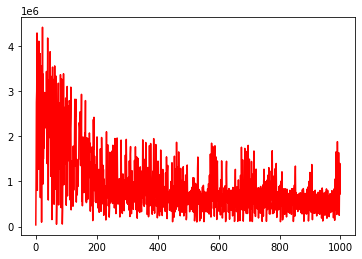

In [22]:
X = torch.tensor(Cancer.data,dtype=torch.float32)
T = torch.tensor(Cancer.target,dtype=torch.long)

W = torch.nn.Linear(F,C)
loss = torch.nn.CrossEntropyLoss(reduction='sum')
optim = torch.optim.SGD(W.parameters(), lr=5e-4)

Ls=[]
for e in range(1000):
  optim.zero_grad()
  L = loss(W(X),T)
  L.backward()
  optim.step()
  Ls.append(L.item())
plt.plot(Ls,'r-')

In [23]:
_,T_pred = W(X).topk(1)
acc=(T_pred.flatten()==T).sum(dtype=torch.float) / len(T)
print(f'accuracy={acc}')

accuracy=0.5730336904525757
